## Descriptive analysis

This notebook contains codes and data analysis for descriptive analysis of my thesis. It mainly focuses on plotting the bar of frequencies and the heatmap of co-occurrences of the narrative elements in the "Brahe-Novels".

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

C:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Read the file
df = pd.read_csv('C:/users/idaid/Desktop/Brahe_Novels.csv')
df

,full_text,instruction_id,analysis
0,"It's a complicated story, old man,"" began Matv...",1944_123775_1,Summary: The story is about an old widow and h...
1,De tant en tant Isabel li dirigia una amable r...,24729_75592_0,Summary: The text is about the thoughts and fe...
2,"Fortunately, D’Artagnan was not a man to liste...",2609_28574_0,Summary: D'Artagnan and Planchet set out on an...
3,I was no more able to stay behind now than I w...,561_42920_0,Summary: A group of men witness the destructio...
4,Mr. Hopper envied the captain his free and vig...,5388_90198_0,Summary: Mr. Hopper envies the captain and ref...
...,...,...,...
8221,There was her letter to Oliver yet to be writt...,14021_101422_1,Summary: The protagonist is contemplating writ...
8222,"Lors Satan, dans un jour de familiarite, daign...",11766_36724_0,Summary: Satan consults with demons about what...
8223,Le jure lui avoua alors franchement qu'ils ava...,13149_48926_0,Summary: The protagonist receives a declaratio...
8224,"Mais Julien saisit cette main, la serra contre...",11747_36674_3,Summary: Julien tries to force himself on Maud...


In [5]:
# Calculate frequencies
annotations = ['Summary','Tone', 'Intertextuality', 'Genre','Speech standard','Literary movement', 'Literary form', 'Trope', 
         'Enunciation', 'Narrative arc', 'Active character',  'Quoted work', 
         'Fuzzy place', 'Fuzzy time', 'Time setting', 'Diegetic time', 'Absolute time','Quoted character']

statistic_dict = {}
# Iterate the analysis
for analysis in df.analysis.tolist():
    temp = [text.split(':')[0] for text in analysis.split('\n')]
    for t in temp:
        if t not in annotations:
            continue
        if t not in statistic_dict:
            statistic_dict[t] = 1
        else:
            statistic_dict[t] += 1
            
print(statistic_dict)
# Covert to dataframe
df2 = pd.DataFrame([statistic_dict])
# Concatenate df, df2
df3 = pd.concat([df, df2], axis=1)
# Output to csv
df3.to_csv('C:/users/idaid/Desktop/Brahe_with_frequencies.csv', index=False)

{'Summary': 8223, 'Enunciation': 8148, 'Tone': 8214, 'Genre': 7837, 'Speech standard': 8201, 'Literary form': 8163, 'Active character': 7009, 'Fuzzy time': 1534, 'Fuzzy place': 5513, 'Literary movement': 3426, 'Trope': 3190, 'Narrative arc': 5150, 'Intertextuality': 3207, 'Time setting': 3365, 'Diegetic time': 1449, 'Quoted character': 941, 'Absolute time': 475, 'Quoted work': 492}


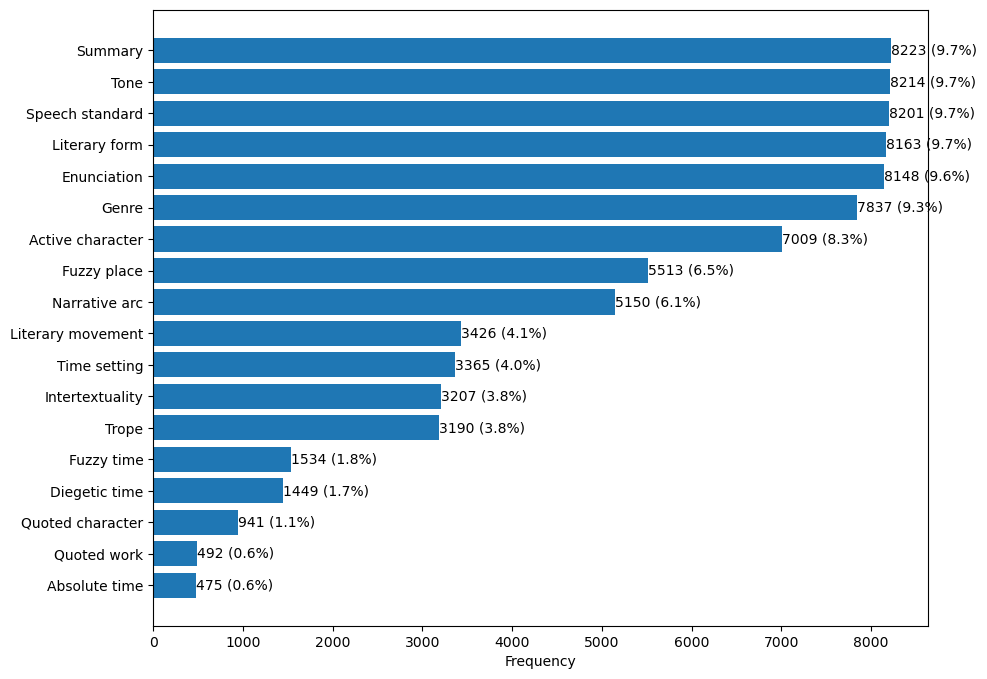

In [8]:
# Sample data
data = {
    'annotation': ['Summary', 'Tone','Speech standard', 'Literary form','Enunciation', 
                   'Genre','Active character','Fuzzy place', 'Narrative arc', 'Literary movement',
                   'Time setting', 'Intertextuality', 'Trope','Fuzzy time', 'Diegetic time', 'Quoted character', 'Quoted work', 'Absolute time'],
    'frequency': [8223, 8214, 8201,8163, 8148,
                  7837, 7009, 5513, 5150, 3426,
                  3365, 3207, 3190,1534, 1449, 941, 492, 475]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Sorting the DataFrame by frequency in descending order
df_sorted = df.sort_values(by='frequency', ascending=False)

# Calculate total frequency and then percentages for each annotation
total_frequency = df_sorted['frequency'].sum()
df_sorted['percentage'] = (df_sorted['frequency'] / total_frequency) * 100

# Creating a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(df_sorted['annotation'], df_sorted['frequency'])
plt.xlabel('Frequency')

# Adding the frequency numbers and percentages on the bars
for bar, percentage in zip(bars, df_sorted['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f} ({percentage:.1f}%)',
             va='center', ha='left')
    
# Invert y axis to have the largest at the top
plt.gca().invert_yaxis()
plt.show()

In [59]:
# Convert the 'analysis' column from the DataFrame 'df' into a list
analysis_data = df['analysis'].tolist()
annotations = ['Summary', 'Tone','Speech standard', 'Literary form','Enunciation',  'Genre','Active character','Fuzzy place', 'Narrative arc', 'Literary movement',
                'Time setting', 'Intertextuality', 'Trope', 'Diegetic time', 'Quoted character', 'Quoted work', 'Absolute time'] 

# Collecting annotation pairs
annotation_pairs = []
for analysis in analysis_data:
    annotations2 = [text.split(':')[0] for text in analysis.split('\n')]
    annotations2 = [a for a in annotations2 if a in annotations]
    sorted_ans = sorted(annotations2, key=lambda x: x)
    for i in range(len(annotations2)-1):
        for j in range(i+1, len(annotations2)):
            annotation_pairs.append((sorted_ans[i], sorted_ans[j]))

# Count frequencies
freqs = dict(Counter(annotation_pairs))

# Initialize DataFrame
df_annotation = pd.DataFrame(np.zeros((len(annotations), len(annotations))), columns=annotations, index=annotations)

# Fill DataFrame based on frequency
for (a1, a2), freq in freqs.items():
    df_annotation.loc[a1, a2] = freq
    df_annotation.loc[a2, a1] = freq

# Compute the total frequency for each annotation
total_freqs = df_annotation.sum()

# Sort annotations by total frequency
sorted_annotations = total_freqs.sort_values(ascending=False).index.tolist()

# Reorder DataFrame by sorted annotations
df_annotation_sorted = df_annotation.loc[sorted_annotations, sorted_annotations]

# Optionally save to CSV
df_annotation_sorted.to_csv('C:/users/idaid/Desktop/annotation_corr_sorted.csv')

# Display the sorted DataFrame
df_annotation_sorted

,Tone,Summary,Speech standard,Literary form,Enunciation,Genre,Active character,Fuzzy place,Narrative arc,Literary movement,Time setting,Trope,Intertextuality,Diegetic time,Quoted character,Absolute time,Quoted work
Tone,0.0,8211.0,8200.0,8163.0,8147.0,7837.0,7008.0,5512.0,5149.0,3426.0,3365.0,3189.0,3207.0,1448.0,941.0,475.0,492.0
Summary,8211.0,0.0,8198.0,8160.0,8145.0,7834.0,7007.0,5512.0,5148.0,3424.0,3365.0,3190.0,3205.0,1449.0,941.0,475.0,492.0
Speech standard,8200.0,8198.0,0.0,8156.0,8140.0,7831.0,7000.0,5507.0,5145.0,3425.0,3363.0,3188.0,3204.0,1449.0,941.0,475.0,492.0
Literary form,8163.0,8160.0,8156.0,0.0,8111.0,7811.0,6986.0,5496.0,5143.0,3422.0,3355.0,3188.0,3181.0,1447.0,940.0,470.0,481.0
Enunciation,8147.0,8145.0,8140.0,8111.0,0.0,7794.0,6996.0,5500.0,5147.0,3419.0,3355.0,3182.0,3166.0,1449.0,941.0,469.0,484.0
Genre,7837.0,7834.0,7831.0,7811.0,7794.0,0.0,6726.0,5324.0,5078.0,3414.0,3323.0,3172.0,3160.0,1422.0,916.0,464.0,471.0
Active character,7008.0,7007.0,7000.0,6986.0,6996.0,6726.0,0.0,5058.0,4747.0,2903.0,2997.0,2915.0,2409.0,1404.0,870.0,382.0,394.0
Fuzzy place,5512.0,5512.0,5507.0,5496.0,5500.0,5324.0,5058.0,0.0,3825.0,2252.0,2384.0,2319.0,2043.0,1160.0,619.0,356.0,278.0
Narrative arc,5149.0,5148.0,5145.0,5143.0,5147.0,5078.0,4747.0,3825.0,0.0,2551.0,2271.0,2646.0,1987.0,1090.0,683.0,302.0,267.0
Literary movement,3426.0,3424.0,3425.0,3422.0,3419.0,3414.0,2903.0,2252.0,2551.0,0.0,1617.0,1862.0,1508.0,682.0,421.0,187.0,214.0


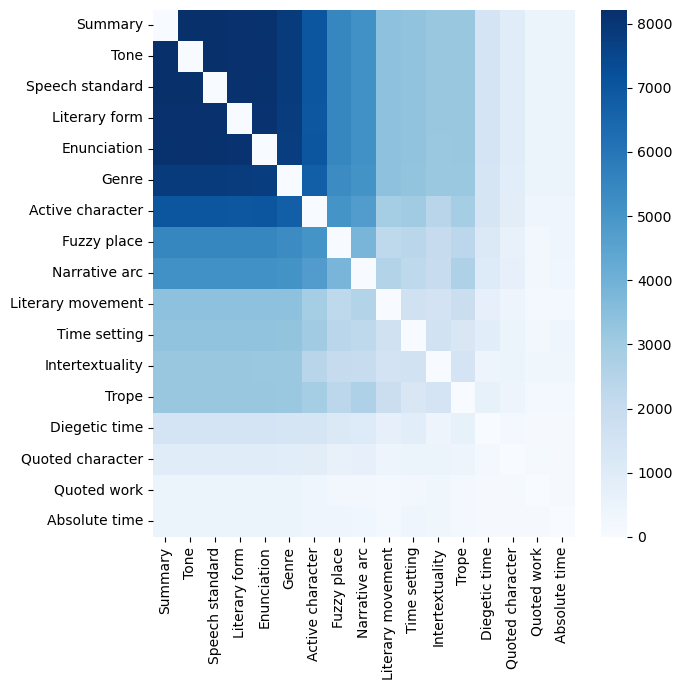

In [62]:
import seaborn as sns
# Plot heatmap
plt.figure(figsize=(7,7))
sns.heatmap(data=df_annotation, cmap=plt.get_cmap('Blues'))
plt.tight_layout()
plt.savefig('C:/users/idaid/Desktop/heatmap.jpg', dpi=180)